In [77]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
from pylab import rcParams
from plotly import tools
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error

In [22]:
df=pd.read_csv("Flipkart_Daily_Data.csv")

In [23]:
df.head()

,Unnamed: 0,Name,LaptopID,RAM,HDD,SSD,Graphic,Link,Price,Best Offer,Date
0,0,Lenovo Ideapad S145 Core i3 7th Gen - (4 GB/1 ...,COMFUGF8YY4HYBUM,4,1024,0,0,https://www.flipkart.com/lenovo-ideapad-s145-c...,29990,5,15/10
1,1,Acer Aspire 7 Ryzen 5 Quad Core 3550H - (8 GB/...,COMFUUJGMZCNJDZH,8,0,512,4,https://www.flipkart.com/acer-aspire-7-ryzen-5...,72990,5,15/10
2,2,Asus VivoBook 15 Core i3 10th Gen - (8 GB/1 TB...,COMFUXREVGEPG3E3,8,1024,0,0,https://www.flipkart.com/asus-vivobook-15-core...,40880,0,15/10
3,3,Asus VivoBook 14 Ryzen 5 Hexa Core 4500U - (8 ...,COMFSKF9ZWGMFX4D,8,0,512,0,https://www.flipkart.com/asus-vivobook-14-ryze...,50991,5,15/10
4,4,HP 15 Ryzen 3 Dual Core 3200U - (4 GB/1 TB HDD...,COMFNXKS7TWWECNF,4,1024,0,0,https://www.flipkart.com/hp-15-ryzen-3-dual-co...,31400,5,15/10


In [24]:
t=0
for i in range(len(df['Price'])):
    try:
        df['Price'][i]=int(df['Price'][i].replace(",",""))
        print(df['Price'][i])
    except TypeError as e:
        t=t+1
z=df['Date']
for i in range(len(z)):
    z[i]=z[i]+'/2020'
a=pd.to_datetime(z,dayfirst=True)
df['Date']=a

29990
72990
40880
50991
31400
53490
68990
50991
65000
74990
35990
64990
36968
59990
39100
73490
90990
39788
39990
54990
65990
54990
31990
40880
39990
89990
32990
92990
62979
38990
55990
78990
42100
55431
94990
96990
59990
96990
59990
46906
67490
50991
64990
55990
31029
72990
122990
89999
38990
61065
91990
73990
72990
51990
122990
67990
119990
98090
82590
142990
63990
161990
41990
45320
69990
38990
34766
38990
40137
96990
56962
69980
80723
43296
174900
81868
104990
52990
33490
38703
142990
122990
174900
122990
51484
54990
70990
55990
79990
58990
59990
64490
39990
52990
42490
73990
114975
61990
24990
86990
76990
27420
126240
42990
55431
61990
40871
52990
40871
87990
122990
89990
68735
37190
77490
89149
57028
40990
48990
69990
74990
194900
24300
40490
43296
86990
73990
199900
65711
77739
40616
55990
82990
44241
31360
88490
64990
27079
39203
95990
48990
194900
47780
50990
43990
32990
199990
27000
52990
85031
139990
28000
48990
88710
154990
74990
149990
120990
76990
85990
75990
70990
81351


111706
36990
187900
169990
199990
78990
33990
48990
78990
97990
154990
79090
226990
59990
74990
69990
189990
69990
12990
58990
245990
259990
229990
69990
209990
199990
118990
183990
154990
175190
82990
84990
26990
55139
214790
109990
209990
76990
62990
36990
48990
149990
78838
98912
118195
158990
68890
79990
95990
185990
116941
48990
233990
99990
132790
26990
85990
128690
139990
80900
75990
209990
116990
73990
269990
274990
75990
179990
83990
62990
224990
28990
279990
339990
86990
61990
12990
79257
239990
69290
79990
322990
54990
269990
79990
75990
76990
69990
167990
62699
89990
114990
54990
99490
42990
139990
37990
144890
51990
74190
38990
28990
52290
230590
33990
62990
43990
52490
73990
74990
69844
37990
71990
72990
198990
52990
55990
213990
167990
81990
53990
45990
38599
220000
55990
59990
38990
59990
209590
34990
147990
179990
86990
61249
119990
74990
88768
186555
129999
52990
52990
52990
55990
52990
59990
74990
57490
59990
59990
28990
59990
31999
81990
38990
60990
54990
72990
2599

111990
28990
70999
32990
51999
72990
140337
179990
118195
69290
122990
239990
41990
34290
61490
79257
101990
54990
49990
274990
322990
40990
86990
72990
79990
34990
40817
68391
61249
83990
67040
48990
132790
139990
61990
21990
222480
69990
39276
28990
146490
129999
45999
28990
45990
37449
42486
42990
99990
257865
208346
54990
47730
85697
325680
64715
73199
62990
76490
74190
214790
38990
69844
28990
69890
204114
114990
57490
82990
49990
89999
52490
39990
60990
99397
65990
42619
70990
69844
148082
74990
28990
104990
55990
55990
81990
55990
167990
38599
88768
85990
59990
52990
66000
179990
73990
119990
55990
90990
52990
52990
59999
52990
45990
59990
124741
71990
60115
52990
38990
59990
74990
59990
59990
59990
41990
74990
89990
81990
95900
28990
38990
255728
93990
72990
137098
75990
244191
85999
149999
84990
71150
32490
79990
31490
81990
94543
115185
95000
61745
72990
46990
43781
51297
56482
35811
20900
41999
53990
44097
61373
53500
32917
35585
103828
245999
24000
28462
31414
98999
42499
8

39299
27965
46990
61745
46500
53990
46881
44097
68000
43781
61373
56482
20900
53500
35811
28462
31414
32917
42499
245999
24000
103828
96999
52990
65500
53900
81000
64990
66490
44490
49279
58800
46200
86000
55729
85500
32955
37990
50922
82900
28250
36499
48571
55000
91999
58500
74900
76012
59500
94500
42000
34688
37699
44599
31808
51990
95695
34990
62990
42486
36990
31360
50613
22990
87990
28000
74910
79990
90990
168490
42990
38990
91990
93490
52990
52990
34299
58990
65990
25990
23990
24347
42490
69990
38703
53990
45783
62990
36968
36424
39990
52820
60990
29990
55990
34763
34459
74990
34292
31039
37788
53490
52990
134990
44990
30990
55990
94990
44241
73990
40990
40880
79990
28990
65990
15990
30990
55990
70990
32182
32990
30773
52990
35990
63990
59990
34459
64990
89990
31029
50490
38990
36990
34766
40616
92990
53990
27990
19990
58990
69303
80990
79990
46906
39990
195902
41990
56990
54990
38990
50991
64990
66990
38990
62990
52990
46990
52990
78990
54990
57990
65990
38990
55591
92990
13109

92990
174900
92990
17990
102990
64990
71990
24990
74990
109990
64990
43990
233912
54990
16990
38990
90990
114990
193990
54990
85990
73990
78990
149990
61999
45990
53990
96990
32990
88710
68990
84990
61990
118990
33990
20990
41990
18990
48990
75990
83990
44990
78990
46990
187990
61990
74990
47990
69990
66990
79990
40817
74990
82990
85031
135990
77482
72990
80990
154990
118990
127990
74990
65711
83990
54990
109990
54639
39107
72990
199990
282990
69990
207990
38990
82990
42990
59900
344990
169990
113990
114990
37949
82990
51130
79990
39990
72990
94990
72118
64990
73990
226990
144890
95990
81990
239990
66990
245990
229990
190990
104990
98912
80900
137989
154990
209990
51990
119990
109990
279990
105990
146490
33490
85990
43999
266990
54990
189990
97990
59990
54990
62594
62990
140337
82990
36990
61990
132990
79090
55139
69990
102551
76250
158990
69500
149990
129999
71800
233990
70999
19990
185990
175190
151133
99990
79257
259990
179990
126873
59990
79990
119890
55990
132190
112990
183990
209

86000
111890
31414
61990
82900
74900
85500
58800
34990
42000
50922
91999
42646
76012
94500
36499
28250
31808
44599
34688
95695
34690
34990
16990
31990
36990
31360
23990
79990
45692
74910
42990
90990
139104
164990
93490
91990
36990
52990
52990
20900
34299
55000
12999
51930
54238
36990
27149
32990
38990
46990
36990
59990
19990
42990
61990
27990
48990
54990
18990
51990
47990
49990
34990
48990
43950
52990
57990
34990
65990
48980
43990
21990
32990
75990
71990
29990
22990
54990
34990
34690
52990
54999
89990
64990
58990
59990
39990
44990
27290
52490
55990
69990
63990
55990
75990
61990
86990
89990
37490
55990
74990
42990
47990
59990
55990
55990
31683
164990
82990
66990
109990
95990
33690
63990
49990
33990
30990
79990
35990
92990
71990
77990
79990
52990
77041
79990
37990
68990
86990
84990
55990
72990
17990
42222
43990
92990
40189
72990
49990
55990
32990
85990
44990
89990
104990
92990
37990
69990
73990
48700
77490
64990
69990
67990
78990
52990
84990
22990
56990
35990
36890
44990
31990
118990
749

79990
69290
52990
254990
199990
55990
257865
24990
167990
52990
86990
233990
69990
34990
28990
59990
52990
99990
53990
52990
59990
132790
214790
55990
79990
59990
31560
20990
59990
59990
37719
17990
107713
120990
269990
83990
33000
69990
103490
54990
325680
80738
69990
79990
139990
99000
175200
42990
57331
224990
65990
39990
59990
89990
62990
37990
196844
39693
47730
70990
57490
255728
104990
71150
42486
72999
78399
51999
69990
73990
74990
54990
82990
104990
92990
79990
85990
42600
74990
125000
69844
65000
41990
47780
244191
41990
209990
129999
44190
119990
89990
79251
98000
60990
84990
81990
46990
46189
61990
89149
93990
149999
268990
64990
126873
61990
86990
137098
25999
60115
38399
53500
44490
94543
56482
51297
86000
59500
58900
31808
35585
58800
65500
32917
55729
95000
245999
34688
81000
49279
96999
38900
36490
103828
104000
37990
38990
42200
64990
78990
47500
32955
115185
81990
74900
24000
61715
85500
82900
35811
55000
34990
94500
46200
42000
44097
31414
111890
91999
43781
28250
6

In [25]:
a=[]
date=[]
price=[]
for i in range(len(df['LaptopID'])):
    if 'COMFMCSBXN5KBXAH'==df['LaptopID'][i]:
        a.append(i)
for i in a:
    date.append(df['Date'][i])
    price.append(df['Price'][i])    


In [26]:
Product['Date']

0    2020-10-15
1    2020-10-23
2    2020-10-24
3    2020-10-25
4    2020-10-26
5    2020-10-27
6    2020-10-28
7    2020-10-29
8    2020-11-02
9    2020-11-05
10   2020-11-06
Name: Date, dtype: datetime64[ns]

In [56]:
r1 = pd.date_range(start='2020-10-15', end='2020-11-10')
p1=[]
flag=0
for i in range(len(r1)):
    for j in range(len(date)):
        if(r1[i]==date[j]):
            p1.append(price[j])
            flag=1
    if(flag==0):
        p1.append(np.nan)
    flag=0
        

In [71]:
Product=pd.DataFrame()
Product['Date']=r1
Product['Price']=p1
Product=Product.ffill(axis = 0)

In [72]:
Product.set_index("Date",inplace=True)

In [73]:
Product

,Price
Date,
2020-10-15,54990.0
2020-10-16,54990.0
2020-10-17,54990.0
2020-10-18,54990.0
2020-10-19,54990.0
2020-10-20,54990.0
2020-10-21,54990.0
2020-10-22,54990.0
2020-10-23,54990.0


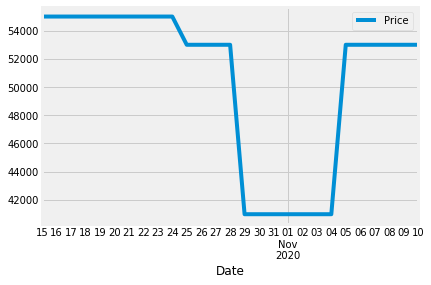

In [76]:
Product.plot()

In [267]:
#Dickey Fuller Test

In [80]:
#H0 - non stationary
#H1- Stationary
def adfuller_test(price):
    result=adfuller(price)
    print(result)
    labels=['ADF Test Statistic','p-value','#Lags','Number of Observations']
    for value,label in zip(result,labels):
        print(label+':'+str(value))
    if result[1]<=0.05:
        print("Alternate hypothesis is to be followed")
    else:
        print("Null Hypothesis")

In [81]:
adfuller_test(Product["Price"])

(-0.9473253771365016, 0.7719884527288408, 7, 19, {'1%': -3.8326031418574136, '5%': -3.0312271701414204, '10%': -2.655519584487535}, 332.8237013566545)
ADF Test Statistic:-0.9473253771365016
p-value:0.7719884527288408
#Lags:7
Number of Observations:19
Null Hypothesis


In [83]:
print(Product.diff())

              Price
Date               
2020-10-15      NaN
2020-10-16      0.0
2020-10-17      0.0
2020-10-18      0.0
2020-10-19      0.0
2020-10-20      0.0
2020-10-21      0.0
2020-10-22      0.0
2020-10-23      0.0
2020-10-24      0.0
2020-10-25  -2000.0
2020-10-26      0.0
2020-10-27      0.0
2020-10-28      0.0
2020-10-29 -12000.0
2020-10-30      0.0
2020-10-31      0.0
2020-11-01      0.0
2020-11-02      0.0
2020-11-03      0.0
2020-11-04      0.0
2020-11-05  12000.0
2020-11-06      0.0
2020-11-07      0.0
2020-11-08      0.0
2020-11-09      0.0
2020-11-10      0.0


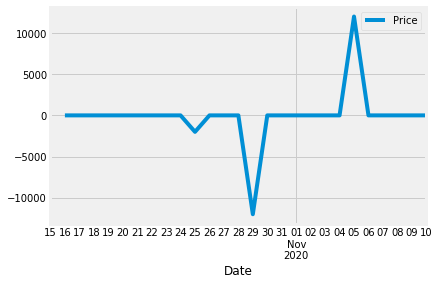

In [82]:
Product.diff().plot()

In [88]:
Product['Price First Difference']=Product['Price']-Product['Price'].shift(1)

In [89]:
Product.head()

,Price,Price First Difference
Date,,
2020-10-15,54990.0,NaN
2020-10-16,54990.0,0.0
2020-10-17,54990.0,0.0
2020-10-18,54990.0,0.0
2020-10-19,54990.0,0.0


In [90]:
adfuller_test(Product['Price First Difference'].dropna())

(-3.3066014554672245, 0.014585955727734953, 6, 19, {'1%': -3.8326031418574136, '5%': -3.0312271701414204, '10%': -2.655519584487535}, 316.0197997345721)
ADF Test Statistic:-3.3066014554672245
p-value:0.014585955727734953
#Lags:6
Number of Observations:19
Alternate hypothesis is to be followed


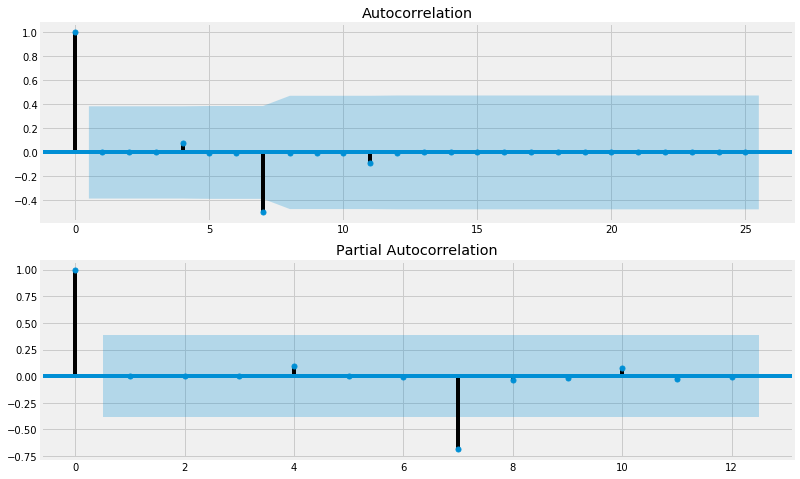

In [258]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(Product['Price'].diff().dropna(),lags=25,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(Product['Price'].diff().dropna(),lags=12,ax=ax2)

                              ARMA Model Results                              
Dep. Variable:                  Price   No. Observations:                   27
Model:                     ARMA(1, 0)   Log Likelihood                -256.527
Method:                       css-mle   S.D. of innovations           3170.202
Date:                Tue, 10 Nov 2020   AIC                            519.055
Time:                        10:07:12   BIC                            522.942
Sample:                    10-15-2020   HQIC                           520.211
                         - 11-10-2020                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.148e+04   2942.242     17.495      0.000    4.57e+04    5.72e+04
ar.L1.Price     0.8185      0.099      8.279      0.000       0.625       1.012
                                    Roots       

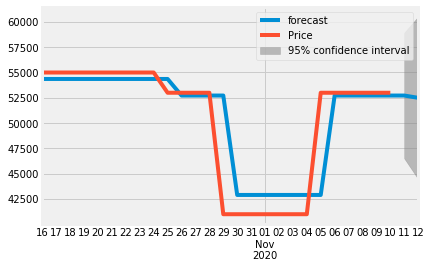

The root mean squared error is 1057.1711420217566.


In [147]:
model = ARMA(Product["Price"], order=(1,0))
result = model.fit()
print(result.summary())
print("μ={} ,ϕ={}".format(result.params[0],result.params[1]))
# Predicting simulated AR(1) model 
result.plot_predict(start=1, end=28)
plt.show()
rmse = math.sqrt(mean_squared_error(Product['Price'], result.predict(start=1,end=27)))
print("The root mean squared error is {}.".format(rmse))

                              ARMA Model Results                              
Dep. Variable:                  Price   No. Observations:                   27
Model:                     ARMA(1, 1)   Log Likelihood                -256.448
Method:                       css-mle   S.D. of innovations           3159.881
Date:                Tue, 10 Nov 2020   AIC                            520.897
Time:                        10:05:14   BIC                            526.080
Sample:                    10-15-2020   HQIC                           522.438
                         - 11-10-2020                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.137e+04   2835.045     18.119      0.000    4.58e+04    5.69e+04
ar.L1.Price     0.7931      0.126      6.272      0.000       0.545       1.041
ma.L1.Price     0.0834      0.210      0.398    

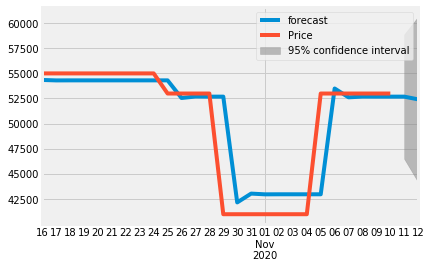

The root mean squared error is 1074.7967290247914.


In [139]:
model = ARIMA(Product["Price"], order=(1,0,1))
result = model.fit()
print(result.summary())
print("μ={} ,ϕ={}".format(result.params[0],result.params[1]))
# Predicting simulated AR(1) model 
result.plot_predict(start=1, end=28)
plt.show()
rmse = math.sqrt(mean_squared_error(Product['Price'], result.predict(start=1,end=27)))
print("The root mean squared error is {}.".format(rmse))

In [268]:
ARIMA
AR  I  MA

statsmodels.tsa.arima_model.ARIMA

                              ARMA Model Results                              
Dep. Variable:                  Price   No. Observations:                   27
Model:                     ARMA(1, 3)   Log Likelihood                -256.355
Method:                       css-mle   S.D. of innovations           3148.092
Date:                Tue, 10 Nov 2020   AIC                            524.710
Time:                        10:18:16   BIC                            532.485
Sample:                    10-15-2020   HQIC                           527.022
                         - 11-10-2020                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.131e+04   2746.239     18.682      0.000    4.59e+04    5.67e+04
ar.L1.Price     0.7544      0.178      4.235      0.000       0.405       1.104
ma.L1.Price     0.1136      0.259      0.439    

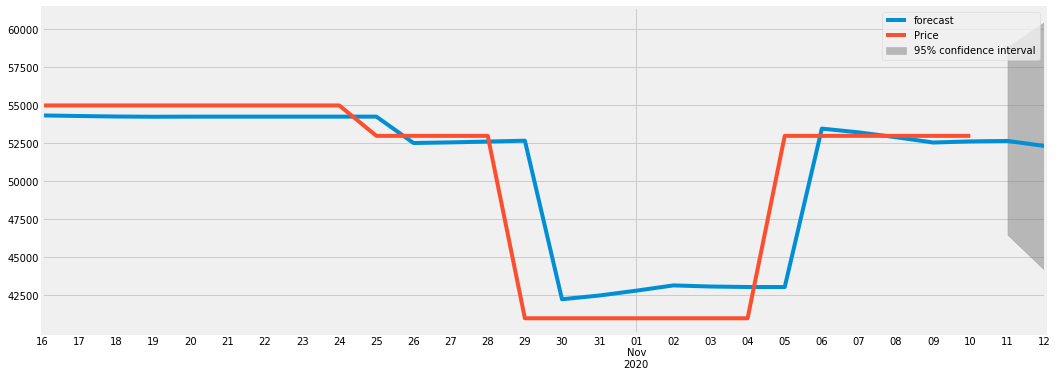

The root mean squared error is 1075.144134518231.


In [176]:
model = ARMA(Product['Price'], order=(1,3))
result = model.fit()
print(result.summary())
print("μ={}, ϕ={}, θ={}".format(result.params[0],result.params[1],result.params[2]))
result.plot_predict(start=1, end=28)
plt.show()
rmse = math.sqrt(mean_squared_error(Product["Price"], result.predict(start=1,end=27)))
print("The root mean squared error is {}.".format(rmse))

                              ARMA Model Results                              
Dep. Variable:                  Price   No. Observations:                   27
Model:                     ARMA(1, 1)   Log Likelihood                -256.448
Method:                       css-mle   S.D. of innovations           3159.881
Date:                Tue, 10 Nov 2020   AIC                            520.897
Time:                        12:45:59   BIC                            526.080
Sample:                    10-15-2020   HQIC                           522.438
                         - 11-10-2020                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.137e+04   2835.045     18.119      0.000    4.58e+04    5.69e+04
ar.L1.Price     0.7931      0.126      6.272      0.000       0.545       1.041
ma.L1.Price     0.0834      0.210      0.398    

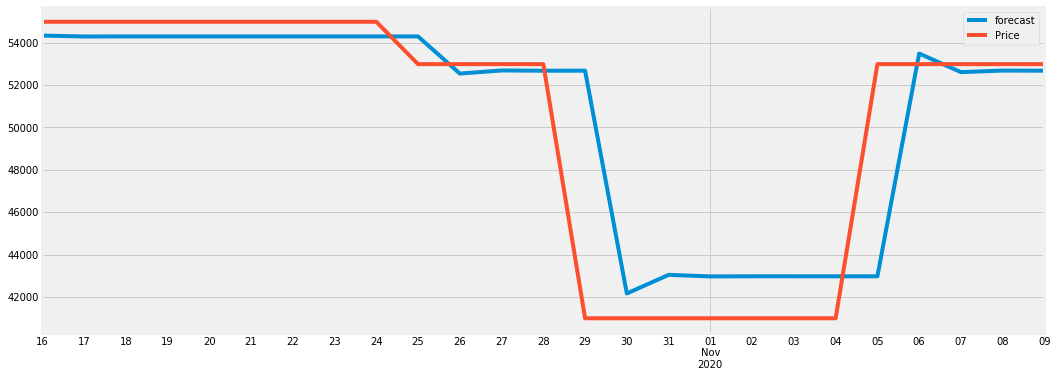

The root mean squared error is Rs.1074.7967290247914.


In [265]:
# Predicting the microsoft stocks volume
rcParams['figure.figsize'] = 16, 6
model = ARIMA(Product['Price'], order=(1,0,1))
result = model.fit()
print(result.summary())
result.plot_predict(start=1, end=25)
plt.show()
rmse = math.sqrt(mean_squared_error(Product['Price'], result.predict(start=1,end=27)))
print("The root mean squared error is Rs.{}.".format(rmse))

                              ARMA Model Results                              
Dep. Variable:                  Price   No. Observations:                   27
Model:                     ARMA(2, 0)   Log Likelihood                -256.431
Method:                       css-mle   S.D. of innovations           3157.523
Date:                Tue, 10 Nov 2020   AIC                            520.863
Time:                        12:53:33   BIC                            526.046
Sample:                    10-15-2020   HQIC                           522.404
                         - 11-10-2020                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.137e+04   2809.922     18.282      0.000    4.59e+04    5.69e+04
ar.L1.Price     0.8882      0.187      4.755      0.000       0.522       1.254
ar.L2.Price    -0.0824      0.188     -0.439    

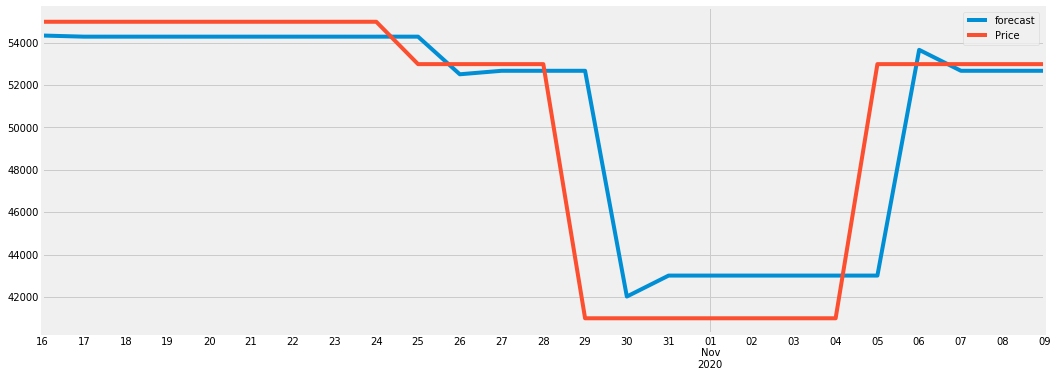

The root mean squared error is Rs. 1084.9417962733673.


In [266]:
# Predicting the microsoft stocks volume
rcParams['figure.figsize'] = 16, 6
model = ARIMA(Product['Price'], order=(2,0,0))
result = model.fit()
print(result.summary())
result.plot_predict(start=1, end=25)
plt.show()
rmse = math.sqrt(mean_squared_error(Product['Price'], result.predict(start=1,end=27)))
print("The root mean squared error is Rs. {}.".format(rmse))

                              ARMA Model Results                              
Dep. Variable:                  Price   No. Observations:                   27
Model:                     ARMA(1, 2)   Log Likelihood                -256.380
Method:                       css-mle   S.D. of innovations           3151.009
Date:                Tue, 10 Nov 2020   AIC                            522.759
Time:                        12:44:09   BIC                            529.238
Sample:                    10-15-2020   HQIC                           524.686
                         - 11-10-2020                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         5.13e+04   2756.491     18.611      0.000    4.59e+04    5.67e+04
ar.L1.Price     0.7651      0.163      4.695      0.000       0.446       1.084
ma.L1.Price     0.1095      0.245      0.447    

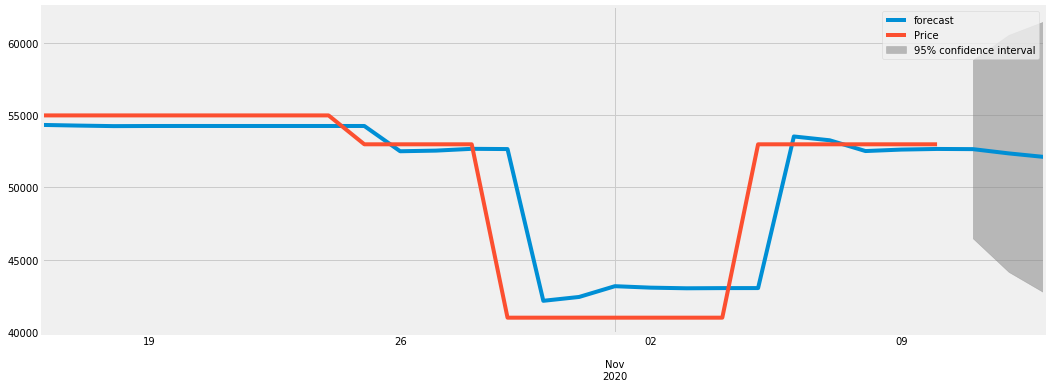

The root mean squared error is Rs. 1085.4192458901123.


In [262]:
# Predicting the microsoft stocks volume
rcParams['figure.figsize'] = 16, 6
model = ARIMA(Product['Price'], order=(1,0,2))
result = model.fit()
print(result.summary())
result.plot_predict(start=1, end=29)
plt.show()
rmse = math.sqrt(mean_squared_error(Product['Price'], result.predict(start=1,end=27)))
print("The root mean squared error is Rs. {}.".format(rmse))